In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the uploaded CSV file to inspect the data
file_path = r'C:\Users\Pear\Documents\Data Projects\data_files\BigmacPrice.csv'

df = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the dataframe
df.head()

,date,currency_code,name,local_price,dollar_ex,dollar_price
0,2000-04-01,ARS,Argentina,2.50,1,2.50
1,2000-04-01,AUD,Australia,2.59,1,2.59
2,2000-04-01,BRL,Brazil,2.95,1,2.95
3,2000-04-01,GBP,Britain,1.90,1,1.90
4,2000-04-01,CAD,Canada,2.85,1,2.85


In [37]:
# Rename the column "name" to "country"
df.rename(columns={"name": "country"}, inplace=True)

df.head(2)

,date,currency_code,country,local_price,dollar_ex,dollar_price
0,2000-04-01,ARS,Argentina,2.50,1,2.50
1,2000-04-01,AUD,Australia,2.59,1,2.59


In [38]:
# Filter data for the United States
df_us = df[df["country"] == "United States"]

df_us.head()

,date,currency_code,country,local_price,dollar_ex,dollar_price
27,2000-04-01,USD,United States,2.24,1,2.24
55,2001-04-01,USD,United States,2.24,1,2.24
87,2002-04-01,USD,United States,2.35,1,2.35
119,2003-04-01,USD,United States,2.46,1,2.46
158,2004-05-01,USD,United States,2.47,1,2.47


In [39]:
# Create a year column
df_us.loc[:, "year"] = pd.to_datetime(df_us["date"]).dt.year

df_us.head()


C:\Users\Pear\AppData\Local\Temp\ipykernel_31368\2741004406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us.loc[:, "year"] = pd.to_datetime(df_us["date"]).dt.year


,date,currency_code,country,local_price,dollar_ex,dollar_price,year
27,2000-04-01,USD,United States,2.24,1,2.24,2000
55,2001-04-01,USD,United States,2.24,1,2.24,2001
87,2002-04-01,USD,United States,2.35,1,2.35,2002
119,2003-04-01,USD,United States,2.46,1,2.46,2003
158,2004-05-01,USD,United States,2.47,1,2.47,2004


In [40]:
# Drop the specified columns from df_us
df_us = df_us.drop(columns=["date", "currency_code", "dollar_ex", "dollar_price"])

# Reorder columns to have "year" as the first column
df_us = df_us[["year", "country", "local_price"]]

# Reset the index
df_us = df_us.reset_index(drop=True)

# Display the updated dataframe
df_us.head()

,year,country,local_price
0,2000,United States,2.24
1,2001,United States,2.24
2,2002,United States,2.35
3,2003,United States,2.46
4,2004,United States,2.47


In [41]:
# Check for duplicate years
duplicate_years = df_us["year"].duplicated().any()

# Count occurrences of each year
year_counts = df_us["year"].value_counts()

# Display duplicate status and year counts
duplicate_years, year_counts.head()


(np.True_,
 year
 2006    2
 2017    2
 2014    2
 2012    2
 2013    2
 Name: count, dtype: int64)

In [42]:
# Check to see if the duplicate years show different prices
# Filter years that appear more than once
duplicate_years_df = df_us[df_us.duplicated(subset=["year"], keep=False)]

# Display the duplicate years dataset
duplicate_years_df.head(10)


,year,country,local_price
6,2006,United States,2.67
7,2006,United States,2.78
8,2007,United States,2.89
9,2007,United States,3.00
12,2010,United States,3.43
13,2010,United States,3.53
15,2012,United States,3.81
16,2012,United States,3.96
17,2013,United States,4.03
18,2013,United States,4.18


In [43]:
# Calcualte the avg price in years with multiple prices
df_us_avg = df_us.groupby("year", as_index=False).agg({"country": "first", "local_price": "mean"})

# Round the local_price to 2 decimal places
df_us_avg["local_price"] = df_us_avg["local_price"].round(2)

# Display the updated dataframe with averaged values
df_us_avg.head(10)

,year,country,local_price
0,2000,United States,2.24
1,2001,United States,2.24
2,2002,United States,2.35
3,2003,United States,2.46
4,2004,United States,2.47
5,2005,United States,2.58
6,2006,United States,2.72
7,2007,United States,2.94
8,2008,United States,3.21
9,2009,United States,3.43


In [45]:
df_us_avg.shape

(23, 3)

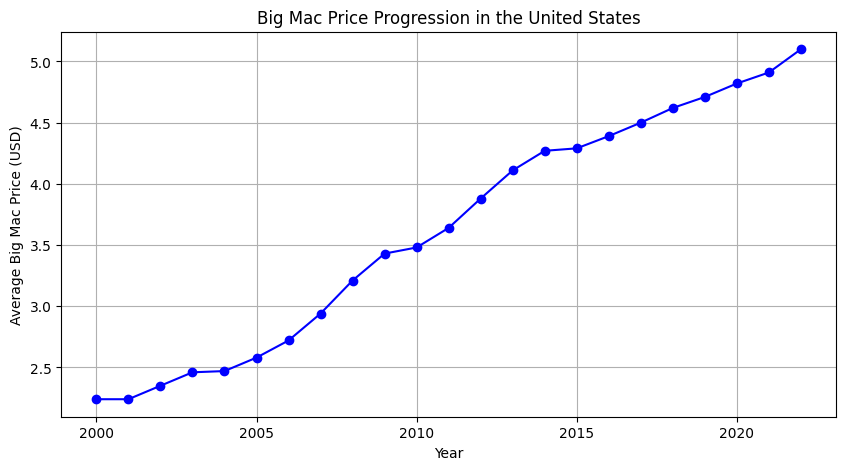

In [46]:
# Create a line chart
plt.figure(figsize=(10, 5))
plt.plot(df_us_avg["year"], df_us_avg["local_price"], marker="o", linestyle="-", color="b")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Average Big Mac Price (USD)")
plt.title("Big Mac Price Progression in the United States")
plt.grid(True)

# Show the plot
plt.show()
